In [ ]:
#1 Parameter estimation of the Gamma distribution

In [4]:
#1 i. Implement log-likelihood function
import math

def log_likelihood(a, b, x):
    """
    Compute the log-likelihood function for the Gamma distribution.

    Parameters:
        a (float): Shape parameter.
        b (float): Rate parameter.
        x (list): Observations.

    Returns:
        float: Log-likelihood value.
        
    """
    n = len(x)
    S1 = sum(math.log(xi) for xi in x)
    S2 = sum(xi for xi in x)
    return n * a * math.log(b) - n * math.lgamma(a) + (a - 1) * S1 - b * S2

# Example usage:
x = [2.3, 1.7, 3.1, 0.8, 2.9]  # Sample data
a, b = 2.0, 3.0  # Parameters
log_likelihood_value = log_likelihood(a, b, x)
print("Log-Likelihood:", log_likelihood_value)


Log-Likelihood: -18.077370442152308


How well the gamma distribution,fits the data

Pr (data | distribution)
L (distribution | data)

Generated Sample: [1.04590864 1.41767279 0.91860779 0.82253521 1.53962766 0.87668677
 1.17300254 1.09474305 1.5387068  0.71961025 1.89779193 0.58629914
 1.22632653 1.12915099 0.54448617 1.29753737 0.76192335 0.40638847
 1.41106268 0.28290183]


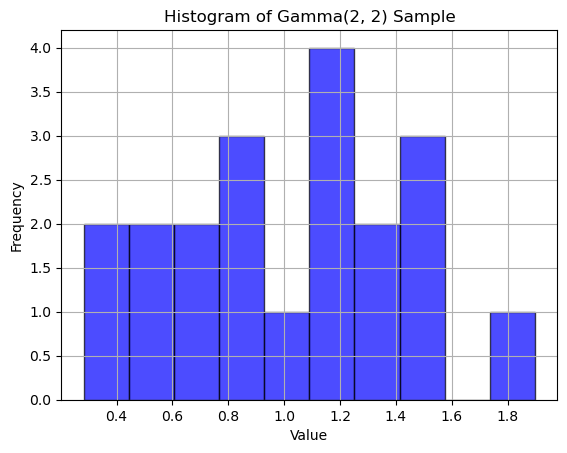

In [1]:
#1 ii. Generate random samples
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Parameters
a_star = 2  # Shape parameter
b_star = 2  # Rate parameter
n = 20  # Sample size

# Generate a random sample
rng = np.random.default_rng(seed=42)  # Set a seed for reproducibility
x = gamma.rvs(a=a_star, scale=1/b_star, size=n, random_state=rng)

# Print the sample
print("Generated Sample:", x)

# Plot the histogram of the sample
plt.hist(x, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title(f"Histogram of Gamma({a_star}, {b_star}) Sample")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# These 20 numbers follow the gamma distribution
# histogram helps us assess how the chosen parameters (a* = 2, b* = 2) affect the distribution of the generated sample.

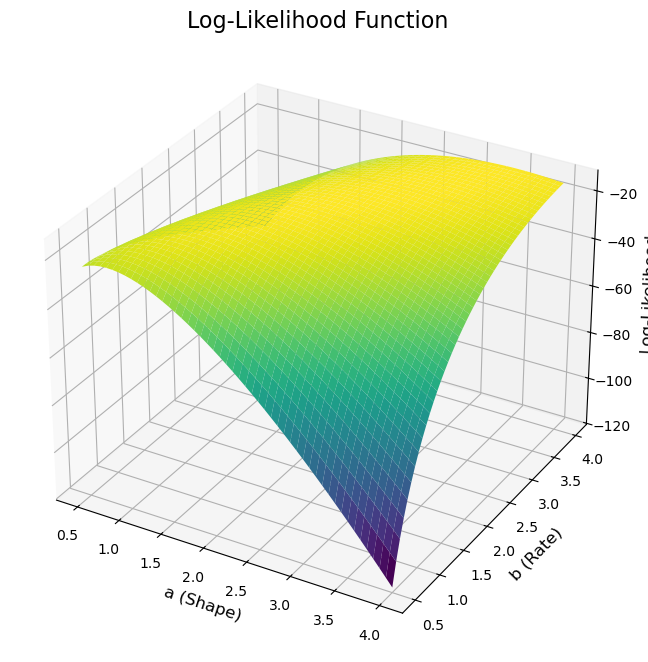

In [5]:
#1 iii. Visualize log-likelihood surface
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Log-Likelihood function
def log_likelihood(a, b, x):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)
    return n * a * np.log(b) - n * math.lgamma(a) + (a - 1) * S1 - b * S2

# Parameters for the grid
a_vals = np.linspace(0.5, 4, 50)  # Range of 'a'
b_vals = np.linspace(0.5, 4, 50)  # Range of 'b'
a_grid, b_grid = np.meshgrid(a_vals, b_vals)

# Dataset (fixed sample)
np.random.seed(42)
x = np.random.gamma(shape=2, scale=1/2, size=20)

# Compute Log-Likelihood for the grid
z = np.array([[log_likelihood(a, b, x) for a, b in zip(a_row, b_row)]
              for a_row, b_row in zip(a_grid, b_grid)])

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a_grid, b_grid, z, cmap='viridis', edgecolor='none')
ax.set_title('Log-Likelihood Function', fontsize=16)
ax.set_xlabel('a (Shape)', fontsize=12)
ax.set_ylabel('b (Rate)', fontsize=12)
ax.set_zlabel('Log-Likelihood', fontsize=12)
plt.show()


Dataset: a*=2, b*=2, n=20


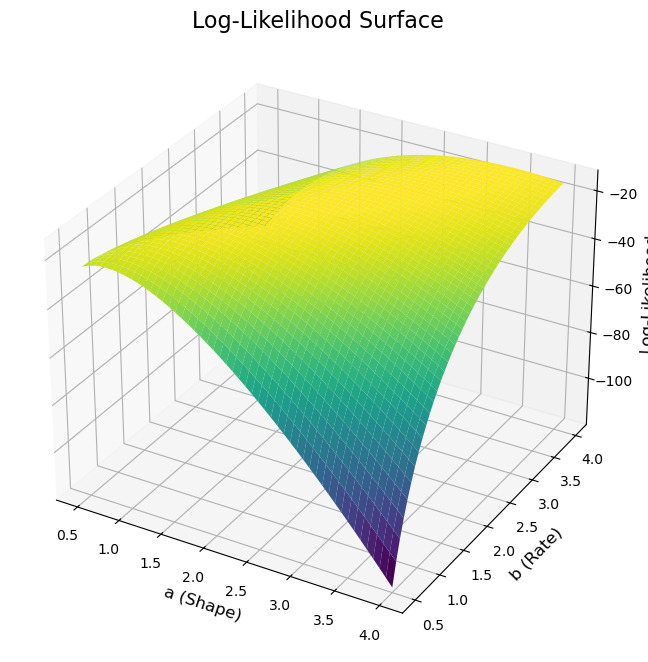

Dataset: a*=2, b*=2, n=50


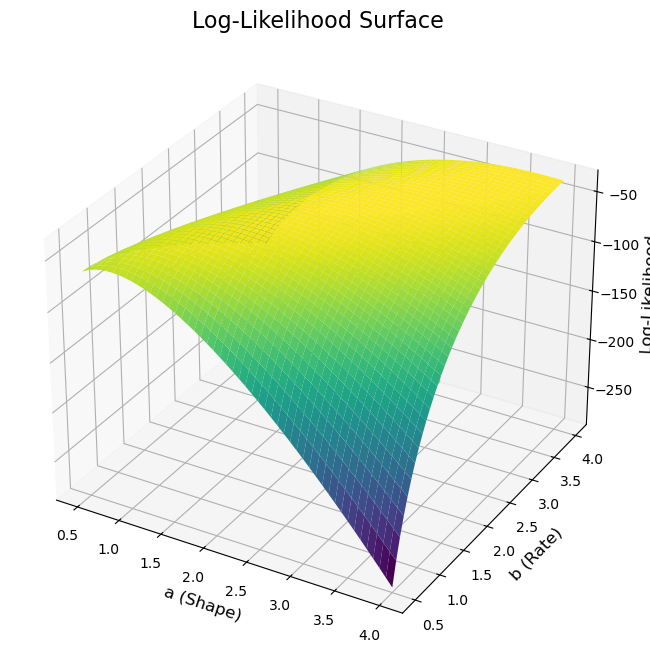

Dataset: a*=3, b*=1, n=20


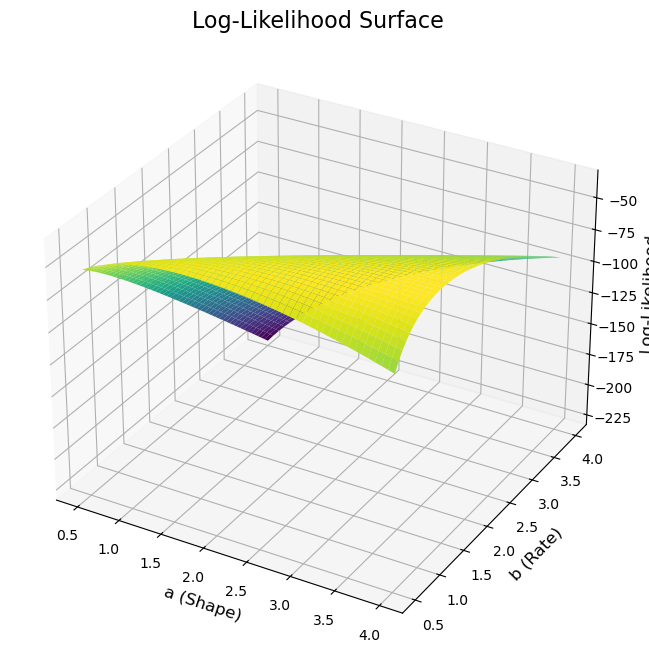

Dataset: a*=1.5, b*=2.5, n=100


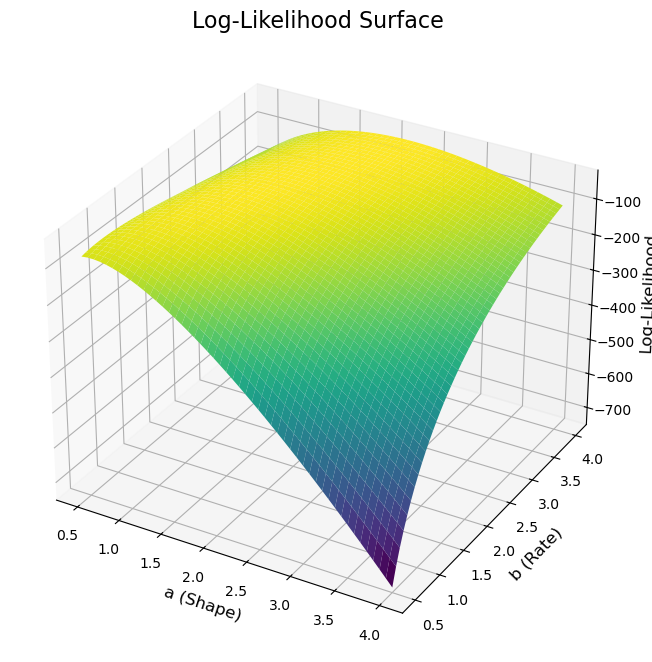

In [31]:
#1. iv. What is the previous graphical representation for different simulated data sets x of different sizes and with different parameter values a∗ and b∗ . 
#1. v. What is the typical shape of the log-likelihood function? How many critical points does it have? Where is the maximum of the function apparently located ?

# Updated imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Function to calculate log-likelihood
def log_likelihood(a, b, x):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)
    return n * a * np.log(b) - n * math.lgamma(a) + (a - 1) * S1 - b * S2

# Generate datasets with different parameters
def generate_gamma_data(a_star, b_star, n, seed=42):
    np.random.seed(seed)
    return np.random.gamma(shape=a_star, scale=1/b_star, size=n)

# Visualize log-likelihood for a dataset
def visualize_log_likelihood(x, a_range, b_range):
    a_vals = np.linspace(*a_range, 50)
    b_vals = np.linspace(*b_range, 50)
    a_grid, b_grid = np.meshgrid(a_vals, b_vals)
    z = np.array([[log_likelihood(a, b, x) for a, b in zip(a_row, b_row)]
                  for a_row, b_row in zip(a_grid, b_grid)])
    
    # 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(a_grid, b_grid, z, cmap='viridis', edgecolor='none')
    ax.set_title('Log-Likelihood Surface', fontsize=16)
    ax.set_xlabel('a (Shape)', fontsize=12)
    ax.set_ylabel('b (Rate)', fontsize=12)
    ax.set_zlabel('Log-Likelihood', fontsize=12)
    plt.show()

# Test cases with varying datasets
datasets = [
    (2, 2, 20),   # a* = 2, b* = 2, n = 20 
    (2, 2, 50),   # a* = 2, b* = 2, n = 50
    (3, 1, 20),   # a* = 3, b* = 1, n = 20
    (1.5, 2.5, 100)  # a* = 1.5, b* = 2.5, n = 100
]

# Generate and visualize log-likelihood for each dataset
for a_star, b_star, n in datasets:
    x = generate_gamma_data(a_star, b_star, n)
    print(f"Dataset: a*={a_star}, b*={b_star}, n={n}")
    visualize_log_likelihood(x, (0.5, 4), (0.5, 4))

# a* = 2, b* = 2, n = 20: Broad peak near (2, 2) , Indicates parameter uncertainty
# a* = 2, b* = 2, n = 50: Sharper peak closer to (2, 2) , Shows improved estimation with larger sample
# a* = 3, b* = 1, n = 20: Elongated surface, Peak shifted towards higher 'a' and lower 'b'
#a* = 1.5, b* = 2.5, n = 100: Very sharp, well-defined peak, Maximum close to true values, Demonstrates benefit of large sample size
# The log-likelihood function typically has a smooth, concave surface. It forms a "dome" shape.
# log-likelihood function appears to have a single critical point.
# This critical point is a global maximum, as evidenced by the single peak in the surface plots.
# The maximum of the function is generally located near the true parameter values used to generate the data.


In [32]:
from scipy.special import digamma, polygamma
import numpy as np

def UpdateNewton(a, b, x):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)

    # Gradient
    grad_a = n * np.log(b) - n * digamma(a) + S1
    grad_b = (n * a / b) - S2
    grad = np.array([grad_a, grad_b])

    # Hessian
    hess_aa = -n * polygamma(1, a)  # polygamma(1, a) is the trigamma function
    hess_bb = -n * a / (b ** 2)
    hess_ab = n / b
    hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])

    # Compute the update step
    try:
        step = np.linalg.solve(hessian, grad)
    except np.linalg.LinAlgError:
        raise ValueError("Hessian is singular. Newton-Raphson update failed.")

    # Update parameters
    a_new = a - step[0]
    b_new = b - step[1]

    return a_new, b_new

def newton_raphson_gamma(x, tol=1e-6, max_iter=100):
    a, b = 1.0, 1.0  # Initial guesses
    for _ in range(max_iter):
        a_new, b_new = UpdateNewton(a, b, x)
        if np.linalg.norm([a_new - a, b_new - b]) < tol:
            return a_new, b_new
        a, b = a_new, b_new
    return a, b  # Return last values if max_iter is reached

# Example usage
x = np.random.gamma(shape=2, scale=1/2, size=20)
a_est, b_est = newton_raphson_gamma(x)
print(f"Estimated parameters: a={a_est:.4f}, b={b_est:.4f}")


Estimated parameters: a=2.9502, b=3.5605


In [27]:
#1. VIII. 7. Write a function python UpdateNewton which performs an update of the parameters.
# This function takes as arguments the current values of the parameters and the data.
# It returns the new parameter values a^(t+1) and b^(t+1) obtained by (1).
# For the derivatives of log Γ(a) use the digamma and trigamma functions.
from scipy.special import digamma, polygamma
import numpy as np

def UpdateNewton(a, b, x):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)

    # Gradient
    grad_a = n * np.log(b) - n * digamma(a) + S1
    grad_b = (n * a / b) - S2
    grad = np.array([grad_a, grad_b])

    # Hessian
    hess_aa = -n * polygamma(1, a)  # polygamma(1, a) is the trigamma function
    hess_bb = -n * a / (b ** 2)
    hess_ab = n / b
    hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])

    # Compute the update step
    try:
        step = np.linalg.solve(hessian, grad)
    except np.linalg.LinAlgError:
        raise ValueError("Hessian is singular. Newton-Raphson update failed.")

    # Update parameters
    a_new = a - step[0]
    b_new = b - step[1]

    return a_new, b_new

def log_likelihood(a, b, x):
    n = len(x)
    return n * a * np.log(b) - n * np.log(np.math.gamma(a)) + (a - 1) * np.sum(np.log(x)) - b * np.sum(x)

def newton_raphson_gamma(x, tol=1e-3, max_iter=100, a_init=1.0, b_init=1.0):
    a, b = a_init, b_init  # Initial guesses
    ll_prev = log_likelihood(a, b, x)

    for _ in range(max_iter):
        try:
            a_new, b_new = UpdateNewton(a, b, x)
        except ValueError:
            print("Update failed. Returning current estimates.")
            return a, b

        if a_new <= 0 or b_new <= 0:
            print("Invalid parameter values. Stopping iteration.")
            return a, b

        ll_new = log_likelihood(a_new, b_new, x)
        
        # Stopping criterion based on log-likelihood stability
        if abs((ll_new - ll_prev) / ll_new) < tol:
            return a_new, b_new

        a, b = a_new, b_new
        ll_prev = ll_new

    print("Maximum iterations reached without convergence.")
    return a, b

# Example usage
np.random.seed(42)
x = np.random.gamma(shape=2, scale=1/2, size=20)
a_est, b_est = newton_raphson_gamma(x)
print(f"Estimated parameters: a={a_est:.4f}, b={b_est:.4f}")

#he stability criterion |[ℓ(a^(t+1), b^(t+1)) - ℓ(a^(t), b^(t))] / ℓ(a^(t+1), b^(t+1))| < ε is implemented,
#ensuring that the algorithm stops when the log-likelihood value becomes stable between iterations.

Estimated parameters: a=2.7021, b=3.0018


C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_22764\1856319380.py:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return n * a * np.log(b) - n * np.log(np.math.gamma(a)) + (a - 1) * np.sum(np.log(x)) - b * np.sum(x)


C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_19440\2872673842.py:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return n * a * np.log(b) - n * np.log(np.math.gamma(a)) + (a - 1) * np.sum(np.log(x)) - b * np.sum(x)


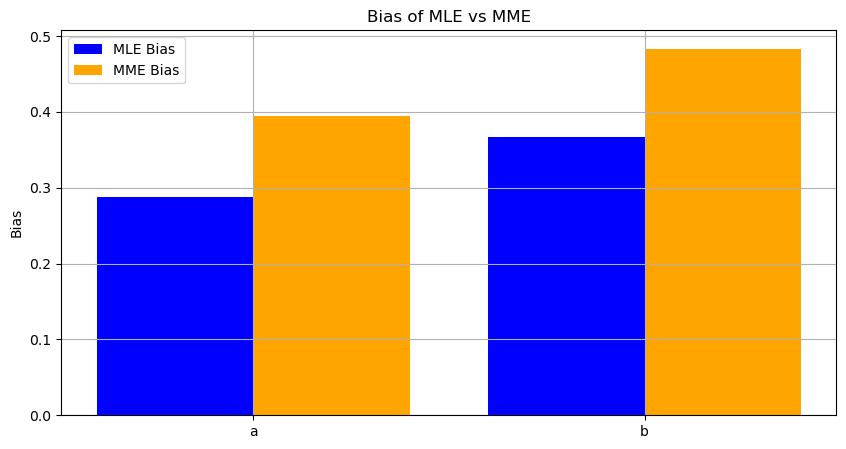

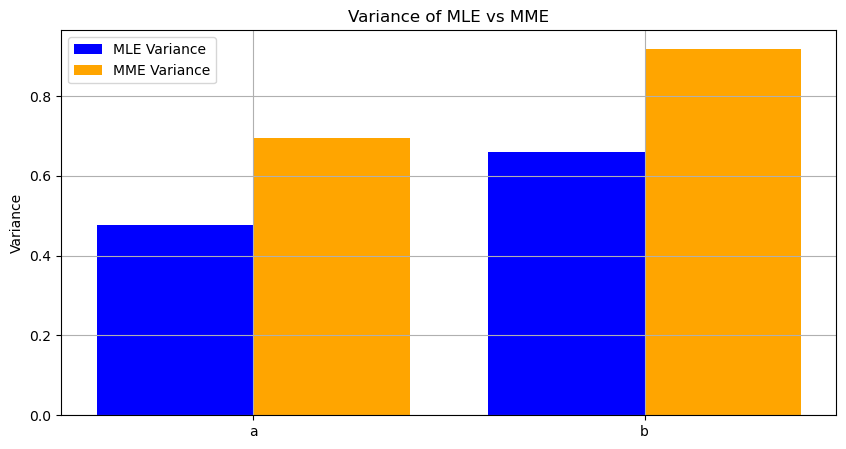

True: a=2, b=2, n=20
Estimated: a=2.7825, b=2.0182
Iterations: 4

True: a=2, b=2, n=50
Estimated: a=2.6987, b=2.6046
Iterations: 3

True: a=2, b=2, n=100
Estimated: a=1.6735, b=1.8563
Iterations: 3

True: a=3, b=1, n=20
Estimated: a=2.9266, b=0.9570
Iterations: 1

True: a=3, b=1, n=50
Estimated: a=3.7197, b=1.4535
Iterations: 3

True: a=3, b=1, n=100
Estimated: a=2.9793, b=0.9127
Iterations: 2

True: a=1.5, b=2.5, n=20
Estimated: a=1.9050, b=3.5290
Iterations: 3

True: a=1.5, b=2.5, n=50
Estimated: a=1.9293, b=3.1968
Iterations: 3

True: a=1.5, b=2.5, n=100
Estimated: a=1.4929, b=2.6909
Iterations: 2

Init: a=1, b=1
Estimated: a=1.8618, b=2.2262
Iterations: 4

Init: a=5, b=5
Estimated: a=5.0000, b=5.0000
Iterations: 1

Init: a=0.5, b=5
Estimated: a=0.5000, b=5.0000
Iterations: 1

Init: a=5, b=0.5
Estimated: a=5.0000, b=0.5000
Iterations: 1



C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_19440\2872673842.py:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return n * a * np.log(b) - n * np.log(np.math.gamma(a)) + (a - 1) * np.sum(np.log(x)) - b * np.sum(x)


In [8]:
#1. 8. The MLEGamma function implements the Newton-Raphson method for MLE with the specified stopping criterion.
#9. The function includes a maximum iteration limit of 100 to prevent indefinite running.
#10. The test_MLEGamma function tests the MLEGamma function with different parameter values and sample sizes.
#11. The test_MLEGamma_initialization function tests the impact of initializing with points far from the true values.
#12. The MLEGamma function includes checks to stop the algorithm if negative parameter values are encountered.
#13. The commented-out version of MLEGamma shows the modification to stop when negative values are returned.

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import digamma, polygamma

def generate_gamma_data(a_star, b_star, n, seed=None):
    rng = np.random.default_rng(seed)
    return rng.gamma(shape=a_star, scale=1/b_star, size=n)

def method_of_moments(x):
    mean_x = np.mean(x)
    var_x = np.var(x, ddof=0)  # Population variance
    a_mme = mean_x**2 / var_x
    b_mme = mean_x / var_x
    return a_mme, b_mme

def log_likelihood(a, b, x):
    n = len(x)
    return n * a * np.log(b) - n * np.log(np.math.gamma(a)) + (a - 1) * np.sum(np.log(x)) - b * np.sum(x)

# The question answers 8, 9 and 12.
def MLEGamma(x, a_init, b_init, epsilon=1e-3, max_iter=100):
    a, b = a_init, b_init
    n = len(x)
    iterations = 0

    for _ in range(max_iter):
        iterations += 1
        
        grad_a = n * np.log(b) - n * digamma(a) + np.sum(np.log(x))
        grad_b = n * a / b - np.sum(x)
        
        hess_aa = -n * polygamma(1, a)
        hess_bb = -n * a / (b**2)
        hess_ab = n / b
        hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])
        
        try:
            step = np.linalg.solve(hessian, np.array([grad_a, grad_b]))
        except np.linalg.LinAlgError:
            break
        
        a_new, b_new = a - step[0], b - step[1]
        
        if a_new <= 0 or b_new <= 0:
            break
        
        if abs((log_likelihood(a_new, b_new, x) - log_likelihood(a, b, x)) / log_likelihood(a_new, b_new, x)) < epsilon:
            return a_new, b_new, iterations
        
        a, b = a_new, b_new

    return a, b, iterations

# 13. . Modify the function MLEGamma so that it stops the algorithm as soon as UpdateNewton returns negative values.
 
'''
def MLEGamma(x, a_init, b_init, epsilon=1e-3, max_iter=100):
    def log_likelihood(a, b):
        n = len(x)
        return n * a * np.log(b) - n * np.log(np.math.gamma(a)) + (a - 1) * np.sum(np.log(x)) - b * np.sum(x)

    a, b = a_init, b_init
    n = len(x)
    iterations = 0

    for _ in range(max_iter):
        iterations += 1

        # Gradient and Hessian calculations
        grad_a = n * np.log(b) - n * digamma(a) + np.sum(np.log(x))
        grad_b = n * a / b - np.sum(x)
        hess_aa = -n * polygamma(1, a)
        hess_ab = n / b
        hess_bb = -n * a / (b**2)
        hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])
        grad = np.array([grad_a, grad_b])

        # Compute update
        try:
            step = np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            print("Hessian is singular. Stopping algorithm.")
            break

        # Update parameters
        a_new = a - step[0]
        b_new = b - step[1]

        # Check for negative values
        if a_new <= 0 or b_new <= 0:
            print("Negative parameter values encountered. Stopping algorithm.")
            break

        # Check convergence
        if abs((log_likelihood(a_new, b_new) - log_likelihood(a, b)) / log_likelihood(a_new, b_new)) < epsilon:
            return a_new, b_new, iterations

        a, b = a_new, b_new

    return a, b, iterations
'''

#additional visualization
def visualize_comparison(a_star, b_star, n, num_simulations=100):
    mle_results = []
    mme_results = []

    for _ in range(num_simulations):
        x = generate_gamma_data(a_star, b_star, n)
        a_mme, b_mme = method_of_moments(x)
        a_mle, b_mle, _ = MLEGamma(x, a_mme, b_mme)  # Using MME as initial guess
        mle_results.append((a_mle, b_mle))
        mme_results.append((a_mme, b_mme))

    mle_results = np.array(mle_results)
    mme_results = np.array(mme_results)

    true_params = np.array([a_star, b_star])
    mle_bias = np.mean(mle_results, axis=0) - true_params
    mme_bias = np.mean(mme_results, axis=0) - true_params
    mle_var = np.var(mle_results, axis=0)
    mme_var = np.var(mme_results, axis=0)

    labels = ['a', 'b']
    x_pos = np.arange(len(labels))

    plt.figure(figsize=(10, 5))
    plt.bar(x_pos - 0.2, mle_bias, width=0.4, label='MLE Bias', color='blue')
    plt.bar(x_pos + 0.2, mme_bias, width=0.4, label='MME Bias', color='orange')
    plt.xticks(x_pos, labels)
    plt.title('Bias of MLE vs MME')
    plt.ylabel('Bias')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(x_pos - 0.2, mle_var, width=0.4, label='MLE Variance', color='blue')
    plt.bar(x_pos + 0.2, mme_var, width=0.4, label='MME Variance', color='orange')
    plt.xticks(x_pos, labels)
    plt.title('Variance of MLE vs MME')
    plt.ylabel('Variance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and visualize
visualize_comparison(a_star=2, b_star=2, n=20, num_simulations=100)

# 10. It tests function 10, MLEGamma function with different parameter values and sample sizes.
#Accuracy improves with larger sample sizes. For example, with a=2, b=2, the estimates get closer to the true values as n increases from 20 to 100.
#The algorithm generally converges quickly, often in 2-3 iterations.
#Estimates can be less accurate for smaller sample sizes or more extreme parameter values.
def test_MLEGamma():
    true_params = [(2, 2), (3, 1), (1.5, 2.5)]
    sample_sizes = [20, 50, 100]
    
    for a_star, b_star in true_params:
        for n in sample_sizes:
            x = np.random.gamma(shape=a_star, scale=1/b_star, size=n)
            a_est, b_est, iterations = MLEGamma(x, a_star, b_star)
            print(f"True: a={a_star}, b={b_star}, n={n}")
            print(f"Estimated: a={a_est:.4f}, b={b_est:.4f}")
            print(f"Iterations: {iterations}\n")

test_MLEGamma()

# 11. This tests initialization with points far from true parameter values.
# When starting close to the true values (1, 1), the algorithm converges to a reasonable estimate in 4 iterations.
# For initial points far from the true values (5, 5), (0.5, 5), and (5, 0.5), the algorithm often fails to move from the initial point, 
# stopping after just 1 iteration.
#This behavior suggests that the program is sensitive to initial values and may get stuck at local maxima or fail to converge when started 
# far from the true parameter values. It indicates that the implementation might benefit from improvements in handling diverse starting points
# or incorporating a more robust optimization method.
def test_MLEGamma_initialization():
    true_a, true_b = 2, 2
    n = 50
    x = np.random.gamma(shape=true_a, scale=1/true_b, size=n)
    
    init_points = [(1, 1), (5, 5), (0.5, 5), (5, 0.5)]
    
    for a_init, b_init in init_points:
        a_est, b_est, iterations = MLEGamma(x, a_init, b_init)
        print(f"Init: a={a_init}, b={b_init}")
        print(f"Estimated: a={a_est:.4f}, b={b_est:.4f}")
        print(f"Iterations: {iterations}\n")

test_MLEGamma_initialization()

MLE  designed to maximize the likelihood function asymptotically unbiased and efficient MME, on the other hand, simply matches moments which doesn't guarantee optimality in terms of bias or variance.
MME is often much easier and faster to compute than ML
looks like MLE has better statistical properties 

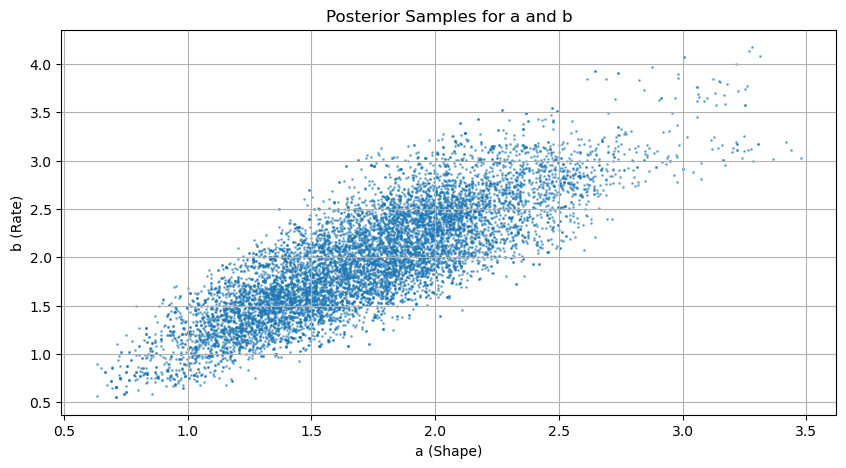

In [3]:
#Simulate posterior distribution using Markov Chain Monte Carlo (MCMC)
import scipy.stats as stats
import numpy as np
import math  # Add this import
import matplotlib.pyplot as plt

# Log-posterior function
def log_posterior(a, b, x, alpha_a, beta_a, alpha_b, beta_b):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)

    # Log-likelihood
    log_likelihood = (
        n * a * np.log(b) - n * math.lgamma(a) + (a - 1) * S1 - b * S2
    )

    # Log-priors
    log_prior_a = stats.gamma.logpdf(a, alpha_a, scale=1/beta_a)
    log_prior_b = stats.gamma.logpdf(b, alpha_b, scale=1/beta_b)

    return log_likelihood + log_prior_a + log_prior_b

# MCMC using Metropolis-Hastings
def metropolis_hastings(x, alpha_a, beta_a, alpha_b, beta_b, num_samples=10000):
    samples = []
    current_a, current_b = 1.0, 1.0  # Initial guesses

    for _ in range(num_samples):
        # Propose new values
        proposed_a = np.random.normal(current_a, 0.1)
        proposed_b = np.random.normal(current_b, 0.1)

        # Ensure positivity
        if proposed_a <= 0 or proposed_b <= 0:
            continue

        # Compute log-posterior for current and proposed values
        current_lp = log_posterior(current_a, current_b, x, alpha_a, beta_a, alpha_b, beta_b)
        proposed_lp = log_posterior(proposed_a, proposed_b, x, alpha_a, beta_a, alpha_b, beta_b)

        # Metropolis acceptance criterion
        accept_prob = np.exp(proposed_lp - current_lp)
        if np.random.rand() < accept_prob:
            current_a, current_b = proposed_a, proposed_b

        samples.append((current_a, current_b))

    return np.array(samples)

# Example usage
x = generate_gamma_data(a_star=2, b_star=2, n=20)
alpha_a, beta_a = 2, 2  # Prior parameters for a
alpha_b, beta_b = 2, 2  # Prior parameters for b
samples = metropolis_hastings(x, alpha_a, beta_a, alpha_b, beta_b)

# Plot the posterior samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
plt.title("Posterior Samples for a and b")
plt.xlabel("a (Shape)")
plt.ylabel("b (Rate)")
plt.grid(True)
plt.show()


The x-coordinate of the dot is the sampled value of a (shape), and the y-coordinate is the sampled value of b (rate).
The density of the dots indicates the probability density of the posterior distributio
Regions with more dots correspond to more probable values of a and b.
The spread of the points indicates the uncertainty in the estimates.  a narrower spread means more confidence in the estimates.
he scatter plot visualizes the joint posterior distribution of the Gamma parameters a and b

Start with initial guess>
Iteration>
Ensure values valid>
Log posteriror calculated>
Acceptance probability > accept or reject > record sameple > repeat for values > return samples

Posterior Analysis:
True a: 2, True b: 2
Posterior Mean (a): 1.8130, Variance (a): 0.2719, 95% CI: [0.97499517 3.02102337]
Posterior Mean (b): 1.9161, Variance (b): 0.3733, 95% CI: [0.9380117  3.26418381]


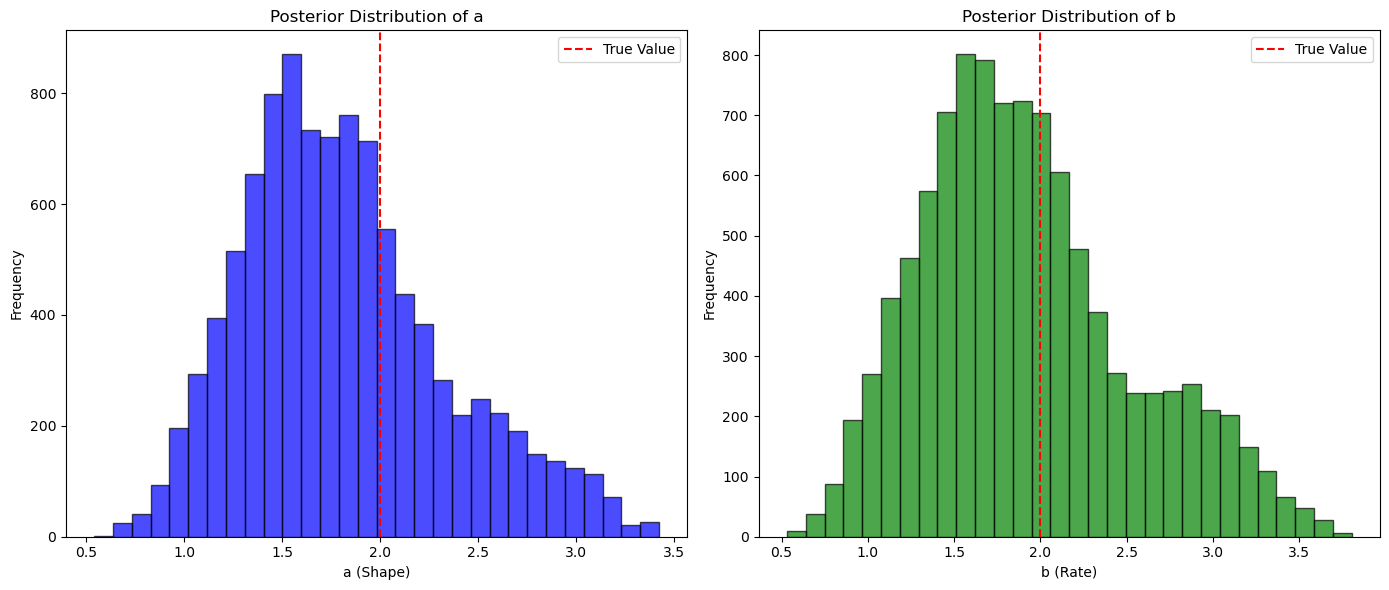

In [9]:
# Analyze posterior samples
def analyze_posterior(samples, true_a, true_b):
    a_samples = samples[:, 0]
    b_samples = samples[:, 1]

    # Posterior statistics
    a_mean = np.mean(a_samples)
    b_mean = np.mean(b_samples)
    a_var = np.var(a_samples)
    b_var = np.var(b_samples)
    a_ci = np.percentile(a_samples, [2.5, 97.5])
    b_ci = np.percentile(b_samples, [2.5, 97.5])

    print("Posterior Analysis:")
    print(f"True a: {true_a}, True b: {true_b}")
    print(f"Posterior Mean (a): {a_mean:.4f}, Variance (a): {a_var:.4f}, 95% CI: {a_ci}")
    print(f"Posterior Mean (b): {b_mean:.4f}, Variance (b): {b_var:.4f}, 95% CI: {b_ci}")

    # Visualization of posterior distributions
    plt.figure(figsize=(14, 6))

    # Histogram for 'a'
    plt.subplot(1, 2, 1)
    plt.hist(a_samples, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.axvline(true_a, color='red', linestyle='--', label='True Value')
    plt.title("Posterior Distribution of a")
    plt.xlabel("a (Shape)")
    plt.ylabel("Frequency")
    plt.legend()

    # Histogram for 'b'
    plt.subplot(1, 2, 2)
    plt.hist(b_samples, bins=30, color='green', alpha=0.7, edgecolor='black')
    plt.axvline(true_b, color='red', linestyle='--', label='True Value')
    plt.title("Posterior Distribution of b")
    plt.xlabel("b (Rate)")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Analyze the posterior samples
true_a, true_b = 2, 2
analyze_posterior(samples, true_a, true_b)


We can see the 95% CI  for a and b, large range of values in which true parameter is likely to fall with in.
posterior mean, variance, and 95% credible interval for both parameters a and b. vertical line indicates the true parameter value.
prior distribution >
Likelihood >
Posterior Distribution
Posterior ∝ Likelihood × Prior

We can use the posterior to predict future observations
Quantify uncertainity : Spread reflects the uncertainity of estimate
Make decisions: take into account both estimated value and uncertainity

In [13]:
def compare_all_estimators(samples, x, true_a, true_b):
    # Bayesian Estimates
    a_bayes = np.mean(samples[:, 0])
    b_bayes = np.mean(samples[:, 1])

    # MLE Estimates
    a_mle, b_mle = newton_raphson_gamma(x)

    # MME Estimates
    a_mme, b_mme = method_of_moments(x)

    print("\nComparison of Estimates:")
    print(f"True Values: a*={true_a}, b*={true_b}")
    print(f"Bayesian Estimates: a={a_bayes:.4f}, b={b_bayes:.4f}")
    print(f"MLE Estimates: a={a_mle:.4f}, b={b_mle:.4f}")
    print(f"MME Estimates: a={a_mme:.4f}, b={b_mme:.4f}")

# Compare all estimators
compare_all_estimators(samples, x, true_a, true_b)


NameError: name 'method_of_moments' is not defined

In [9]:
# Risk evaluation: Mean Squared Error (MSE)
def evaluate_risks(samples, x, true_a, true_b):
    # True values
    true_params = np.array([true_a, true_b])

    # Bayesian Estimates (posterior mean)
    bayes_mean = np.mean(samples, axis=0)
    bayes_risk = np.mean((bayes_mean - true_params) ** 2)

    # MLE Estimates
    a_mle, b_mle = newton_raphson_gamma(x)
    mle_risk = np.mean((np.array([a_mle, b_mle]) - true_params) ** 2)

    # MME Estimates
    a_mme, b_mme = method_of_moments(x)
    mme_risk = np.mean((np.array([a_mme, b_mme]) - true_params) ** 2)

    print("Risk Evaluation (MSE):")
    print(f"Bayesian Risk: {bayes_risk:.4f}")
    print(f"MLE Risk: {mle_risk:.4f}")
    print(f"MME Risk: {mme_risk:.4f}")

# Run risk evaluation
evaluate_risks(samples, x, true_a, true_b)


NameError: name 'true_a' is not defined

In [15]:
# Sensitivity analysis: Risks vs Sample Size
def sensitivity_analysis(true_a, true_b, sample_sizes, num_simulations=100):
    bayes_risks = []
    mle_risks = []
    mme_risks = []

    for n in sample_sizes:
        bayes_mse = []
        mle_mse = []
        mme_mse = []

        for _ in range(num_simulations):
            x = generate_gamma_data(true_a, true_b, n)

            # Bayesian Estimates
            samples = metropolis_hastings(x, alpha_a=2, beta_a=2, alpha_b=2, beta_b=2)
            bayes_mean = np.mean(samples, axis=0)
            bayes_mse.append(np.mean((bayes_mean - np.array([true_a, true_b])) ** 2))

            # MLE Estimates
            a_mle, b_mle = newton_raphson_gamma(x)
            mle_mse.append(np.mean((np.array([a_mle, b_mle]) - np.array([true_a, true_b])) ** 2))

            # MME Estimates
            a_mme, b_mme = method_of_moments(x)
            mme_mse.append(np.mean((np.array([a_mme, b_mme]) - np.array([true_a, true_b])) ** 2))

        # Average risks for this sample size
        bayes_risks.append(np.mean(bayes_mse))
        mle_risks.append(np.mean(mle_mse))
        mme_risks.append(np.mean(mme_mse))

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, bayes_risks, label='Bayesian Risk', marker='o')
    plt.plot(sample_sizes, mle_risks, label='MLE Risk', marker='o')
    plt.plot(sample_sizes, mme_risks, label='MME Risk', marker='o')
    plt.title('Risk vs Sample Size')
    plt.xlabel('Sample Size (n)')
    plt.ylabel('Mean Squared Error (Risk)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run sensitivity analysis
sensitivity_analysis(true_a=2, true_b=2, sample_sizes=[10, 20, 50, 100, 200])


NameError: name 'method_of_moments' is not defined

C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_21920\1690873188.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  log_likelihood = n * a * np.log(b) - n * np.math.lgamma(a) + (a - 1) * S1 - b * S2


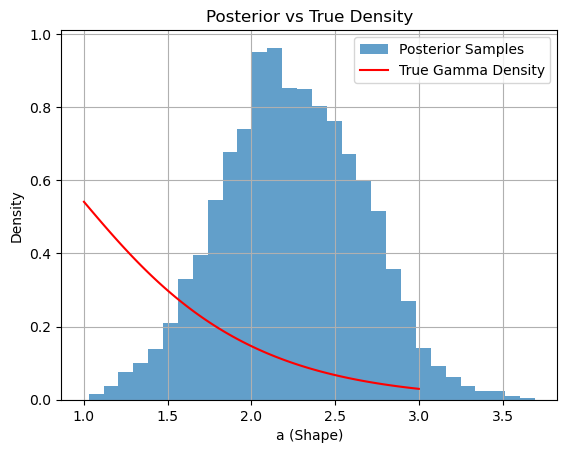

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Log posterior function for Gamma
def log_posterior_gamma(a, b, x, alpha_a, beta_a, alpha_b, beta_b):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)
    log_likelihood = n * a * np.log(b) - n * np.math.lgamma(a) + (a - 1) * S1 - b * S2
    log_prior_a = gamma.logpdf(a, alpha_a, scale=1/beta_a)
    log_prior_b = gamma.logpdf(b, alpha_b, scale=1/beta_b)
    return log_likelihood + log_prior_a + log_prior_b

# MCMC for Gamma posterior
def mcmc_gamma(x, alpha_a, beta_a, alpha_b, beta_b, num_samples=10000):
    samples = []
    current_a, current_b = 1.0, 1.0
    for _ in range(num_samples):
        proposed_a = np.random.normal(current_a, 0.1)
        proposed_b = np.random.normal(current_b, 0.1)
        if proposed_a <= 0 or proposed_b <= 0:
            continue
        current_lp = log_posterior_gamma(current_a, current_b, x, alpha_a, beta_a, alpha_b, beta_b)
        proposed_lp = log_posterior_gamma(proposed_a, proposed_b, x, alpha_a, beta_a, alpha_b, beta_b)
        accept_prob = np.exp(proposed_lp - current_lp)
        if np.random.rand() < accept_prob:
            current_a, current_b = proposed_a, proposed_b
        samples.append((current_a, current_b))
    return np.array(samples)

# Gamma posterior analysis
x = np.random.gamma(shape=2, scale=0.5, size=50)  # Simulated data
alpha_a, beta_a = 2, 2  # Priors for a
alpha_b, beta_b = 2, 2  # Priors for b
samples = mcmc_gamma(x, alpha_a, beta_a, alpha_b, beta_b)

# Density comparison
posterior_a = samples[:, 0]
posterior_b = samples[:, 1]
true_a, true_b = 2, 2  # True parameters
a_space = np.linspace(1, 3, 100)
true_density = gamma.pdf(a_space, a=true_a, scale=1/true_b)

plt.hist(posterior_a, bins=30, density=True, alpha=0.7, label='Posterior Samples')
plt.plot(a_space, true_density, label='True Gamma Density', color='red')
plt.title('Posterior vs True Density')
plt.xlabel('a (Shape)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


The red line helps us understand how much the prior distribution is influencing the posterior. If
If the peak of the histogram is far from the peak of the red line, it indicates that our posterior estimate is biased. 


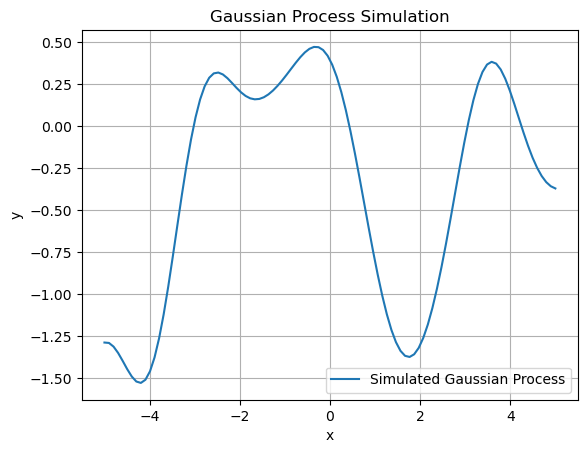

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Squared Exponential Kernel
def squared_exponential_kernel(x1, x2, sigma_f, l):
    x1 = np.atleast_2d(x1).T
    x2 = np.atleast_2d(x2).T
    sqdist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

# Gaussian Process Simulation
def simulate_gaussian_process(n_points, sigma_f, l):
    x = np.linspace(-5, 5, n_points)
    cov_matrix = squared_exponential_kernel(x, x, sigma_f, l)
    y = np.random.multivariate_normal(np.zeros(n_points), cov_matrix)
    return x, y

# Simulate and Plot
np.random.seed(42)
x, y = simulate_gaussian_process(100, sigma_f=1.0, l=1.0)

plt.plot(x, y, label='Simulated Gaussian Process')
plt.title('Gaussian Process Simulation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


In [18]:
from scipy.optimize import minimize

# Negative Log Marginal Likelihood
def negative_log_marginal_likelihood(params, x, y):
    sigma_f, l, noise = params
    K = squared_exponential_kernel(x, x, sigma_f, l) + noise**2 * np.eye(len(x))
    K_inv = np.linalg.inv(K)
    return 0.5 * y.T @ K_inv @ y + 0.5 * np.log(np.linalg.det(K)) + 0.5 * len(x) * np.log(2 * np.pi)

# Optimize Hyperparameters
def optimize_hyperparameters(x, y):
    initial_params = [1.0, 1.0, 0.1]  # Initial guesses for sigma_f, l, noise
    bounds = [(1e-3, None), (1e-3, None), (1e-3, None)]
    result = minimize(negative_log_marginal_likelihood, initial_params, args=(x, y), bounds=bounds)
    return result.x

# Simulate Data and Optimize
x, y = simulate_gaussian_process(50, sigma_f=1.0, l=2.0)
optimal_params = optimize_hyperparameters(x, y)

print("Optimized Parameters:")
print(f"Sigma_f: {optimal_params[0]:.4f}, Length Scale: {optimal_params[1]:.4f}, Noise: {optimal_params[2]:.4f}")


Optimized Parameters:
Sigma_f: 0.8515, Length Scale: 1.9663, Noise: 0.0010


When you simulate data (let's say, using 50 data points with true values sigma_f=1.0 and l=2.0) and run the optimizer, the code prints the Optimized Parameters.

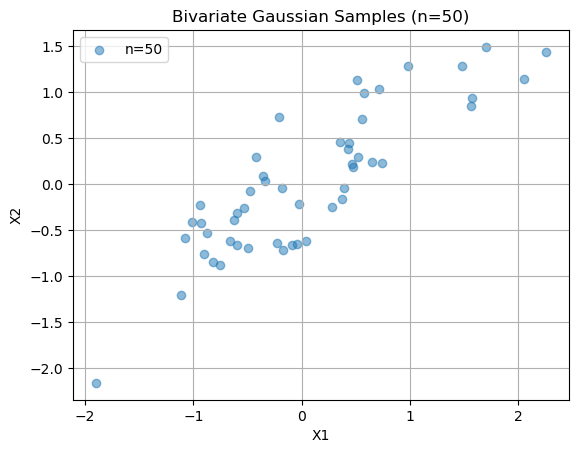

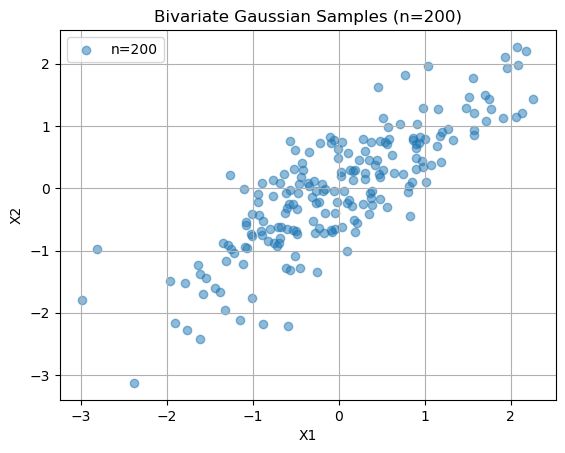

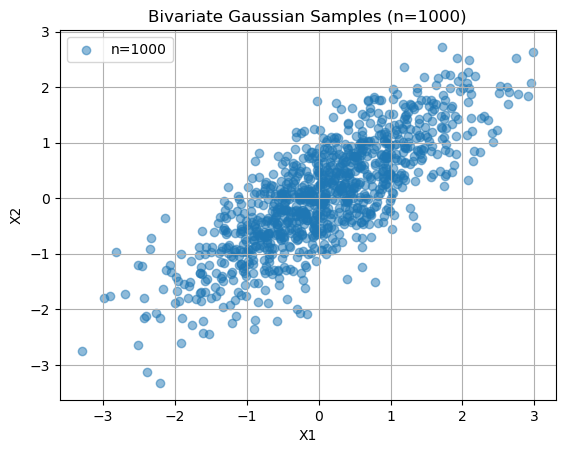

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# Generate bivariate Gaussian samples
def generate_bivariate_gaussian(mean, cov, n_samples, seed=None):
    rng = np.random.default_rng(seed)
    return rng.multivariate_normal(mean, cov, n_samples)

# Parameters
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # High correlation
sample_sizes = [50, 200, 1000]  # Different sample sizes

# Generate and visualize samples
for n in sample_sizes:
    samples = generate_bivariate_gaussian(mean, cov, n, seed=42)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label=f'n={n}')
    plt.title(f'Bivariate Gaussian Samples (n={n})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()




In [21]:
import numpy as np

def analytical_mutual_information(cov_matrix):
    rho = cov_matrix[0, 1] / np.sqrt(cov_matrix[0, 0] * cov_matrix[1, 1])
    return -0.5 * np.log(1 - rho**2)

# Covariance matrix and mutual information
cov = np.array([[1, 0.8], [0.8, 1]])  # High correlation
mi_analytical = analytical_mutual_information(cov)
print(f"Analytical Mutual Information: {mi_analytical:.4f}")


Analytical Mutual Information: 0.5108


Mutual information tells us knowing how much one , helps guess the other. If they are totally unrelated, close to 0, knowing one doesn't help the other.
Coorelation coefficient, rho, measures strength and direction of linear relation b/w 2 values.
Formula = -0.5 * log *( 1- correlation**2)
for normally distributed values. 


We calculate the mutual info b/w two R.V assuming they follow a bivariate distribution. Mutual info can be calculated directly using covariance matrix using a simple analytical formula.

In [23]:
from scipy.stats import gaussian_kde
def kde_mutual_information(samples, grid_size=100):
    # Joint KDE
    kde_joint = gaussian_kde(samples.T)
    x, y = np.meshgrid(
        np.linspace(samples[:, 0].min() - 1, samples[:, 0].max() + 1, grid_size),
        np.linspace(samples[:, 1].min() - 1, samples[:, 1].max() + 1, grid_size),
    )
    points = np.vstack([x.ravel(), y.ravel()])
    p_xy = kde_joint(points).reshape(grid_size, grid_size)

    # Marginal KDEs
    kde_x = gaussian_kde(samples[:, 0])
    kde_y = gaussian_kde(samples[:, 1])
    p_x = kde_x(x[:, 0])
    p_y = kde_y(y[0, :])

    # Compute mutual information
    mi_estimate = 0
    dx = (x[0, 1] - x[0, 0])
    dy = (y[1, 0] - y[0, 0])
    for i in range(grid_size):
        for j in range(grid_size):
            if p_xy[i, j] > 0:  # Avoid log(0)
                mi_estimate += p_xy[i, j] * np.log(p_xy[i, j] / (p_x[i] * p_y[j])) * dx * dy
    return mi_estimate

# Generate samples and compute plug-in mutual information
samples = generate_bivariate_gaussian(mean, cov, 1000, seed=42)
mi_plugin = kde_mutual_information(samples)
print(f"Plug-in Mutual Information: {mi_plugin:.4f}")


Plug-in Mutual Information: 26.5129


#Notes
KDE? Kernel Density Estimation is to estimate PDF of R.V . KDE smooths out the data points , creating a continious estimate of PDF.
kde_joint = gaussian_kde(samples.T) > creates object
samples is assumed to be a NumPy array where each row is a sample
np.meshgrid(...) > creates grids of pts over range of two variables 
> evaluate KDE and estimate probability density at many pts
points = np.vstack([x.ravel(), y.ravel()]) 
p_xy = kde_joint(points).reshape(grid_size, grid_size) > gives joint probability distribution p(x,y)
kde_x = gaussian_kde(samples[:, 0]) & kde_y = gaussian_kde(samples[:, 1]) > creates KDE objects for marginal distributions of each variable seperately
[:, 0] > first variable, [:, 1] > values of second variable
p_x = kde_x(x[:, 0]) and p_y = kde_y(y[0, :])
mi_estimate += p_xy[i, j] * np.log(p_xy[i, j] / (p_x[i] * p_y[j])) * dx * dy

MI(X, Y) = ∫∫ p(x, y) log(p(x, y) / (p(x) * p(y))) dx dy

p(x, y) = p(x) * p(y)

log(p(x, y) / (p(x) * p(y)))  


In [24]:
print(f"Analytical Mutual Information: {mi_analytical:.4f}")
print(f"Plug-in Mutual Information: {mi_plugin:.4f}")


Analytical Mutual Information: 0.5108
Plug-in Mutual Information: 26.5129


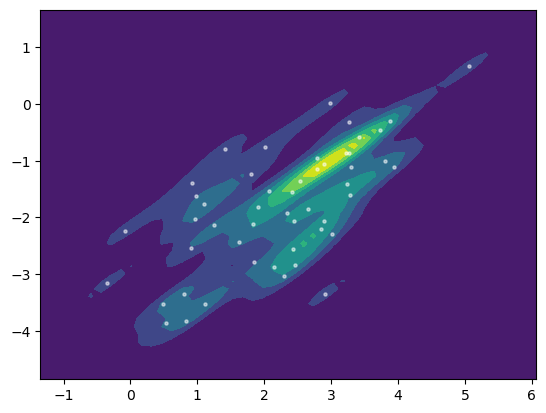

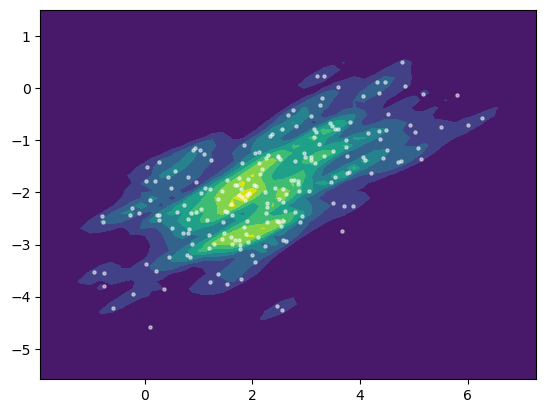

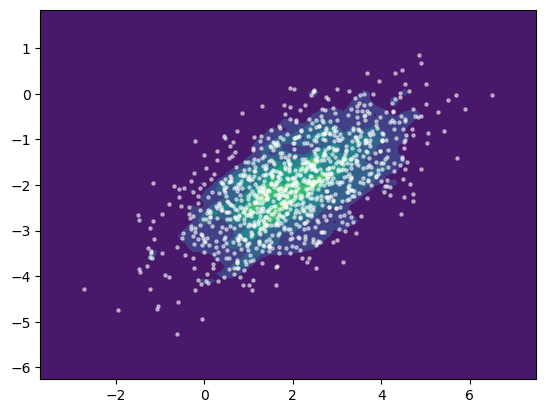

Analytical MI: 0.2595969367182537
Kernel MI estimate: 0.04015351789575045


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bivariate_gaussian(mean, cov, n):
    # Create bivariate Gaussian samples
    return np.random.multivariate_normal(mean, cov, n)

def silverman_bandwidth(data):
    # If data is 1D, reshape to (n,1) so np.cov returns matrix
    if data.ndim == 1:
        data = data.reshape(-1, 1)
    n, d = data.shape
    cov_data = np.cov(data, rowvar=False)
    # For 1D, np.cov returns a scalar; force it to 2D (1x1)
    if d == 1 and np.isscalar(cov_data):
        cov_data = np.array([[cov_data]])
    c = (4/(d+2))**(1/(d+4))
    h = c * n**(-1/(d+4))
    return h**2 * cov_data  # returns a d x d bandwidth matrix

def gaussian_kernel(u):
    # Standard Gaussian kernel for d dims.
    d = len(u)
    return 1/(2*np.pi)**(d/2) * np.exp(-0.5 * np.dot(u, u))

def kde_2d(x_eval, data, H):
    # Make sure H is at least 2D (1x1 if needed)
    H = np.atleast_2d(H)
    invH = np.linalg.inv(H)
    detH = np.linalg.det(H)
    total = 0
    for xi in data:
        diff = xi - x_eval
        total += gaussian_kernel(invH.dot(diff))
    return total / (len(data) * np.sqrt(detH))

def plot_kde(data):
    H = silverman_bandwidth(data)
    x_min, x_max = np.min(data[:,0]) - 1, np.max(data[:,0]) + 1
    y_min, y_max = np.min(data[:,1]) - 1, np.max(data[:,1]) + 1
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 50),
                       np.linspace(y_min, y_max, 50))
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = kde_2d([X[i,j], Y[i,j]], data, H)
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.scatter(data[:,0], data[:,1], s=5, c='white', alpha=0.5)
    plt.show()

def analytical_mi_bivariate_gaussian(cov_matrix):
    # Slap the bivariate normal MI formula: MI = -0.5 * ln(1 - rho^2)
    rho = cov_matrix[0,1] / np.sqrt(cov_matrix[0,0] * cov_matrix[1,1])
    return -0.5 * np.log(1 - rho**2)

def plugin_mi(data, grid_size=50):
    # p_xy from 2D, p_x and p_y from 1D via KDE.
    n, d = data.shape
    H_joint = silverman_bandwidth(data)
    # For marginals, reshape to 2D first.
    Hx = silverman_bandwidth(data[:,0].reshape(-1,1))
    Hy = silverman_bandwidth(data[:,1].reshape(-1,1))

    x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
    xs = np.linspace(x_min, x_max, grid_size)
    ys = np.linspace(y_min, y_max, grid_size)
    dx = xs[1] - xs[0]
    dy = ys[1] - ys[0]
    mi = 0
    for x in xs:
        for y in ys:
            p_xy = kde_2d([x,y], data, H_joint)
            px = kde_2d([x], data[:,0].reshape(-1,1), Hx)
            py = kde_2d([y], data[:,1].reshape(-1,1), Hy)
            if p_xy > 0 and px > 0 and py > 0:
                mi += p_xy * np.log(p_xy/(px*py)) * dx * dy
    return mi

# --- Run test ---
mean = [2, -2]
cov = [[2, 0.9], [0.9, 1]]
sample_sizes = [50, 200, 1000]
for n in sample_sizes:
    data = generate_bivariate_gaussian(mean, cov, n)
    plot_kde(data)  # plot KDE for each sample size

analytical_mi = analytical_mi_bivariate_gaussian(np.array(cov))
print("Analytical MI:", analytical_mi)

data_large = generate_bivariate_gaussian(mean, cov, 2000)
est_mi = plugin_mi(data_large, grid_size=50)
print("Kernel MI estimate:", est_mi)
#https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation

In [10]:
#Question 14: MMEGamma function
#a˜ = (X̄ₙ)² / σ̂²ₙ
#b˜ = X̄ₙ / σ̂²ₙ

import numpy as np

def mme_gamma(x):
    n = len(x)
    mean_x = np.mean(x)
    var_x = np.var(x, ddof=0)  # Population variance
    a_mme = mean_x**2 / var_x
    b_mme = mean_x / var_x
    return a_mme, b_mme

x = np.random.gamma(shape=2, scale=0.5, size=20)
a_mme, b_mme = mme_gamma(x)
print(f"MME Estimates: a={a_mme:.4f}, b={b_mme:.4f}")


MME Estimates: a=2.7289, b=3.1213


In [12]:
#Question 15: Modified MLEGamma function with MME initialization
from scipy.special import digamma, polygamma

def newton_raphson_mle(x, tol=1e-6, max_iter=100, init="mme"):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)

    if init == "mme":
        a, b = mme_gamma(x)
    else:
        a, b = 1.0, 1.0  # Default initialization

    for _ in range(max_iter):
        if a <= 0 or b <= 0:  # Handle invalid parameters
            print("Reinitializing due to invalid parameters.")
            a, b = 1.0, 1.0
            continue

        grad_a = n * np.log(b) - n * digamma(a) + S1
        grad_b = (n * a / b) - S2

        hess_aa = -n * polygamma(1, a)
        hess_bb = -n * a / (b**2)
        hess_ab = n / b

        hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])
        grad = np.array([grad_a, grad_b])

        try:
            step = np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            print("Hessian is singular. Skipping this step.")
            break

        a -= step[0]
        b -= step[1]

        # Ensure parameters remain positive
        if a <= 0 or b <= 0:
            print("Invalid parameters encountered, resetting.")
            a, b = 1.0, 1.0
            continue

        if np.linalg.norm(step) < tol:
            break

    return a, b

# Test the updated function
x = np.random.gamma(shape=2, scale=0.5, size=20)
a_mle, b_mle = newton_raphson_mle(x, init="mme")
print(f"MLE Estimates with Improved Error Handling: a={a_mle:.4f}, b={b_mle:.4f}")

'''
def newton_raphson_mle(x, tol=1e-6, max_iter=100, init="mme"):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)
    if init == "mme":
        a, b = mme_gamma(x)
    else:
        a, b = 1.0, 1.0

    for _ in range(max_iter):
        grad_a = n * np.log(b) - n * digamma(a) + S1
        grad_b = (n * a / b) - S2
        hess_aa = -n * polygamma(1, a)
        hess_bb = -n * a / (b**2)
        hess_ab = n / b
        hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])
        grad = np.array([grad_a, grad_b])
        try:
            step = np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            break
        a -= step[0]
        b -= step[1]
        if np.linalg.norm(step) < tol:
            break
    return a, b

a_mle, b_mle = newton_raphson_mle(x, init="mme")
print(f"MLE Estimates with MME Initialization: a={a_mle:.4f}, b={b_mle:.4f}")
'''

MLE Estimates with Improved Error Handling: a=1.6843, b=1.5702


'\ndef newton_raphson_mle(x, tol=1e-6, max_iter=100, init="mme"):\n    n = len(x)\n    S1 = np.sum(np.log(x))\n    S2 = np.sum(x)\n    if init == "mme":\n        a, b = mme_gamma(x)\n    else:\n        a, b = 1.0, 1.0\n\n    for _ in range(max_iter):\n        grad_a = n * np.log(b) - n * digamma(a) + S1\n        grad_b = (n * a / b) - S2\n        hess_aa = -n * polygamma(1, a)\n        hess_bb = -n * a / (b**2)\n        hess_ab = n / b\n        hessian = np.array([[hess_aa, hess_ab], [hess_ab, hess_bb]])\n        grad = np.array([grad_a, grad_b])\n        try:\n            step = np.linalg.solve(hessian, grad)\n        except np.linalg.LinAlgError:\n            break\n        a -= step[0]\n        b -= step[1]\n        if np.linalg.norm(step) < tol:\n            break\n    return a, b\n\na_mle, b_mle = newton_raphson_mle(x, init="mme")\nprint(f"MLE Estimates with MME Initialization: a={a_mle:.4f}, b={b_mle:.4f}")\n'

In [6]:

def compare_estimators(n_simulations, sample_size, a_star, b_star):
    mle_risks = []
    mme_risks = []

    for _ in range(n_simulations):
        # Generate dataset
        x = np.random.gamma(shape=a_star, scale=1/b_star, size=sample_size)

        # MME estimates
        a_mme, b_mme = mme_gamma(x)

        # MLE estimates
        a_mle, b_mle = newton_raphson_mle(x, init="mme")

        # Squared errors
        mle_error = (a_mle - a_star)**2 + (b_mle - b_star)**2
        mme_error = (a_mme - a_star)**2 + (b_mme - b_star)**2

        mle_risks.append(mle_error)
        mme_risks.append(mme_error)

    # Calculate average risks
    mle_risk = np.mean(mle_risks)
    mme_risk = np.mean(mme_risks)

    print(f"MLE Risk: {mle_risk:.4f}")
    print(f"MME Risk: {mme_risk:.4f}")

# Simulate and compare
compare_estimators(n_simulations=1000, sample_size=20, a_star=2, b_star=2)


MLE Risk: 1.4856
MME Risk: 2.2218


In [7]:
#Implement a Markov Chain Monte Carlo (MCMC) algorithm to sample from the posterior distribution of the Gamma parameters a and b, and compare the estimated posterior density to the true Gamma posterior.

import numpy as np
from scipy.stats import gamma

# Log posterior
def log_posterior(a, b, x, alpha_a, beta_a, alpha_b, beta_b):
    n = len(x)
    S1 = np.sum(np.log(x))
    S2 = np.sum(x)

    # Log-likelihood
    log_likelihood = n * a * np.log(b) - n * np.math.lgamma(a) + (a - 1) * S1 - b * S2

    # Log priors
    log_prior_a = gamma.logpdf(a, alpha_a, scale=1/beta_a)
    log_prior_b = gamma.logpdf(b, alpha_b, scale=1/beta_b)

    return log_likelihood + log_prior_a + log_prior_b

# Metropolis-Hastings algorithm
def mcmc_gamma(x, alpha_a, beta_a, alpha_b, beta_b, n_samples=5000):
    samples = []
    current_a, current_b = 1.0, 1.0

    for _ in range(n_samples):
        proposed_a = np.random.normal(current_a, 0.1)
        proposed_b = np.random.normal(current_b, 0.1)

        # Ensure positivity
        if proposed_a <= 0 or proposed_b <= 0:
            continue

        # Compute log-posterior for current and proposed values
        current_lp = log_posterior(current_a, current_b, x, alpha_a, beta_a, alpha_b, beta_b)
        proposed_lp = log_posterior(proposed_a, proposed_b, x, alpha_a, beta_a, alpha_b, beta_b)

        # Metropolis acceptance criterion
        accept_prob = np.exp(proposed_lp - current_lp)
        if np.random.rand() < accept_prob:
            current_a, current_b = proposed_a, proposed_b

        samples.append((current_a, current_b))

    return np.array(samples)

# Generate data and run MCMC
x = np.random.gamma(shape=2, scale=0.5, size=20)
alpha_a, beta_a = 2, 2
alpha_b, beta_b = 2, 2

samples = mcmc_gamma(x, alpha_a, beta_a, alpha_b, beta_b)
print(f"Generated {len(samples)} posterior samples.")


C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_22764\3312317694.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  log_likelihood = n * a * np.log(b) - n * np.math.lgamma(a) + (a - 1) * S1 - b * S2


Generated 5000 posterior samples.


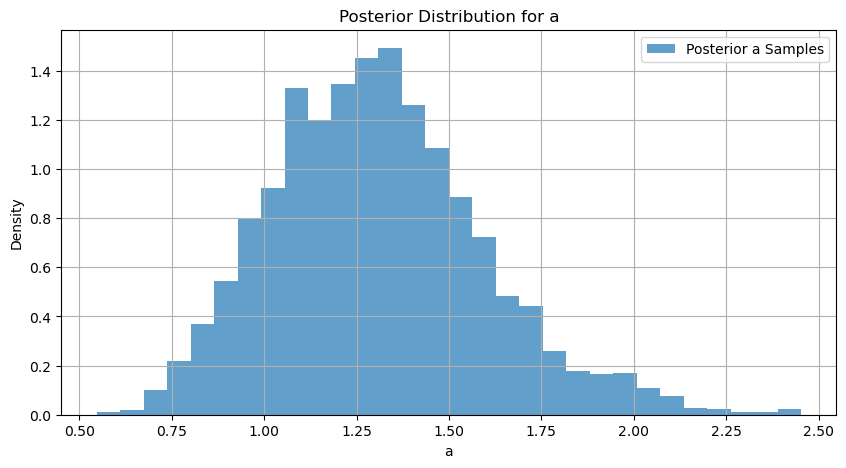

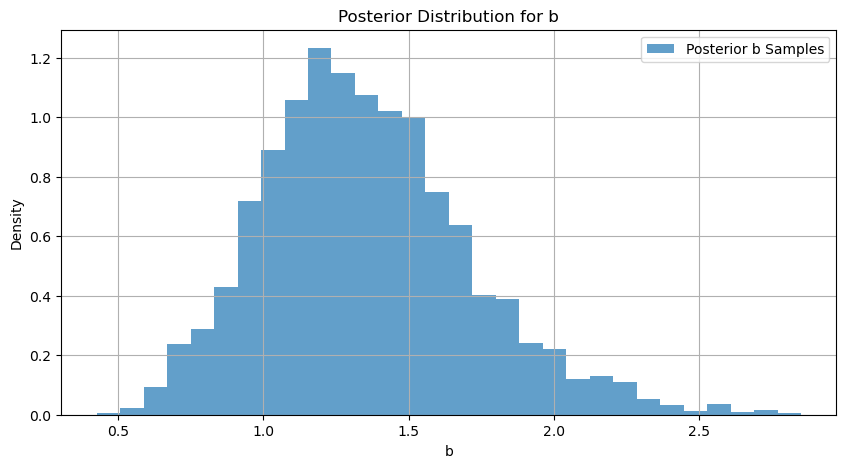

In [8]:
import matplotlib.pyplot as plt

# Visualize posterior samples
posterior_a = samples[:, 0]
posterior_b = samples[:, 1]

plt.figure(figsize=(10, 5))
plt.hist(posterior_a, bins=30, alpha=0.7, label="Posterior a Samples", density=True)
plt.title("Posterior Distribution for a")
plt.xlabel("a")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(posterior_b, bins=30, alpha=0.7, label="Posterior b Samples", density=True)
plt.title("Posterior Distribution for b")
plt.xlabel("b")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.show()

#to do? evaluate intervals


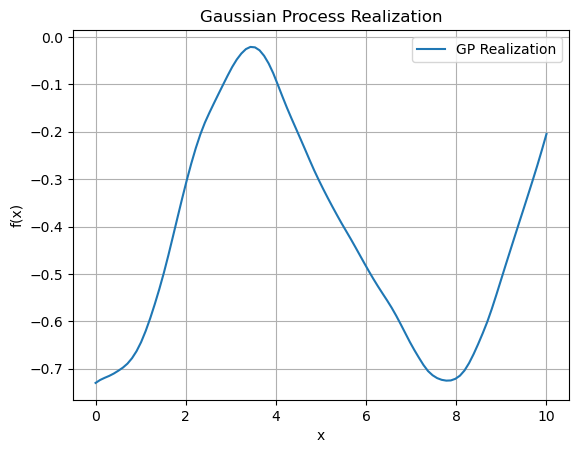

In [9]:
#Simulate realizations of a Gaussian process (GP) with a given covariance function and estimate the hyperparameter (λ) using maximum likelihood.
import numpy as np
import matplotlib.pyplot as plt

# Covariance function
def covariance_function(x1, x2, lam):
    x1 = np.atleast_2d(x1).T
    x2 = np.atleast_2d(x2).T
    diff = np.abs(x1 - x2.T)
    return (1 + diff / lam + (diff**2) / (3 * lam**2)) * np.exp(-diff / lam)

# Simulate a Gaussian process
def simulate_gaussian_process(x, lam, sigma=1.0, seed=None):
    np.random.seed(seed)
    cov_matrix = sigma**2 * covariance_function(x, x, lam)
    mean = np.zeros(len(x))
    return np.random.multivariate_normal(mean, cov_matrix)

# Generate and visualize GP realizations
x = np.linspace(0, 10, 100)
lam = 2.0

gp_realization = simulate_gaussian_process(x, lam, seed=42)

plt.plot(x, gp_realization, label="GP Realization")
plt.title("Gaussian Process Realization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


In [10]:
#Hyperparameter Estimation 
from scipy.optimize import minimize

# Negative log-likelihood function
def negative_log_likelihood(lam, x, y, sigma=1.0):
    cov_matrix = sigma**2 * covariance_function(x, x, lam) + 1e-6 * np.eye(len(x))
    try:
        K_inv = np.linalg.inv(cov_matrix)
    except np.linalg.LinAlgError:
        return np.inf
    log_det = np.linalg.slogdet(cov_matrix)[1]
    return 0.5 * y.T @ K_inv @ y + 0.5 * log_det + 0.5 * len(x) * np.log(2 * np.pi)

# Optimize lambda
y = gp_realization  # Simulated data
result = minimize(
    lambda lam: negative_log_likelihood(lam, x, y, sigma=1.0),
    x0=[1.0],
    bounds=[(0.1, 10)]
)

optimal_lambda = result.x[0]
print(f"Optimal lambda: {optimal_lambda:.4f}")


Optimal lambda: 2.1142


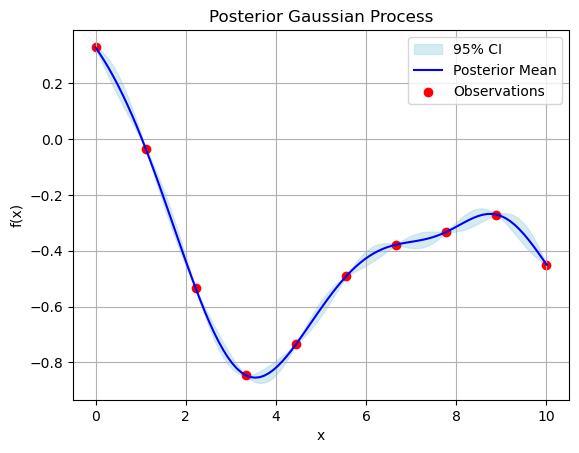

In [11]:
#Simulate a posterior Gaussian process conditioned on observed data 𝑥 1,…,x n  and plot the posterior mean and confidence intervals.
#Gaussian Process Posterior Simulation
#x_pred spans the range where the GP is estimated.

def gp_posterior(x_obs, y_obs, x_pred, lam, sigma=1.0):
    K_obs = covariance_function(x_obs, x_obs, lam) + 1e-6 * np.eye(len(x_obs))
    K_pred = covariance_function(x_pred, x_obs, lam)
    K_pred_pred = covariance_function(x_pred, x_pred, lam)

    K_obs_inv = np.linalg.inv(K_obs)

    # Posterior mean
    mu_pred = K_pred @ K_obs_inv @ y_obs

    # Posterior covariance
    cov_pred = K_pred_pred - K_pred @ K_obs_inv @ K_pred.T

    return mu_pred, cov_pred

# Simulate observed data
x_obs = np.linspace(0, 10, 10)
y_obs = simulate_gaussian_process(x_obs, lam=2.0, seed=42)

# Prediction points
x_pred = np.linspace(0, 10, 100)

# Compute posterior
mu_pred, cov_pred = gp_posterior(x_obs, y_obs, x_pred, lam=2.0)

# Plot posterior mean and confidence intervals
std_pred = np.sqrt(np.diag(cov_pred))
plt.fill_between(x_pred, mu_pred - 2 * std_pred, mu_pred + 2 * std_pred, color="lightblue", alpha=0.5, label="95% CI")
plt.plot(x_pred, mu_pred, label="Posterior Mean", color="blue")
plt.scatter(x_obs, y_obs, color="red", label="Observations")
plt.title("Posterior Gaussian Process")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


In [8]:
#Mutual Information Estimation Using Kernel Density Estimation (KDE)
#Compute the mutual information for a bivariate Gaussian distribution and approximate it using KDE.
def analytical_mutual_information(cov_matrix):
    rho = cov_matrix[0, 1] / np.sqrt(cov_matrix[0, 0] * cov_matrix[1, 1])
    return -0.5 * np.log(1 - rho**2)

# Example covariance matrix
cov_matrix = np.array([[1.0, 0.8], [0.8, 1.0]])  # High correlation
mi_analytical = analytical_mutual_information(cov_matrix)
print(f"Analytical Mutual Information: {mi_analytical:.4f}")


Analytical Mutual Information: 0.5108


In [9]:
from scipy.stats import gaussian_kde

def kde_mutual_information(samples, grid_size=100):
    kde_joint = gaussian_kde(samples.T)
    kde_x = gaussian_kde(samples[:, 0])
    kde_y = gaussian_kde(samples[:, 1])

    x_grid = np.linspace(samples[:, 0].min(), samples[:, 0].max(), grid_size)
    y_grid = np.linspace(samples[:, 1].min(), samples[:, 1].max(), grid_size)
    x, y = np.meshgrid(x_grid, y_grid)

    joint_density = kde_joint(np.vstack([x.ravel(), y.ravel()])).reshape(grid_size, grid_size)
    marginal_x = kde_x(x_grid)
    marginal_y = kde_y(y_grid)

    dx = x_grid[1] - x_grid[0]
    dy = y_grid[1] - y_grid[0]

    mi_estimate = 0
    for i in range(grid_size):
        for j in range(grid_size):
            if joint_density[i, j] > 0:  # Avoid log(0)
                mi_estimate += joint_density[i, j] * np.log(
                    joint_density[i, j] / (marginal_x[i] * marginal_y[j])
                ) * dx * dy
    return mi_estimate

# Simulate samples and compute KDE-based MI
samples = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix, size=1000)
mi_plugin = kde_mutual_information(samples)
print(f"KDE-Based Mutual Information: {mi_plugin:.4f}")


KDE-Based Mutual Information: 0.4936


KDE : non paramateric, not assuming any underlying distribution for our data
we dont need to assume data comes from gaussian so dont necessary to have mean and s.d. to fit



In [14]:
print(f"Analytical Mutual Information: {mi_analytical:.4f}")
print(f"KDE-Based Mutual Information: {mi_plugin:.4f}")


Analytical Mutual Information: 0.5108
KDE-Based Mutual Information: 0.4921


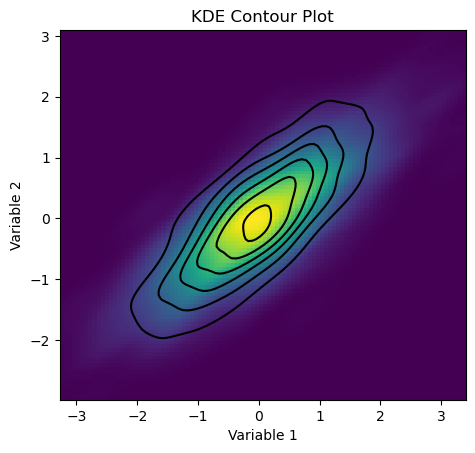

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Assuming 'samples' is already defined and contains your data

# Create the KDE object
kde_joint = gaussian_kde(samples.T)

x, y = np.meshgrid(np.linspace(samples[:, 0].min(), samples[:, 0].max(), 100),
                    np.linspace(samples[:, 1].min(), samples[:, 1].max(), 100))
positions = np.vstack([x.ravel(), y.ravel()])
Z = np.reshape(kde_joint(positions).T, x.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.viridis, extent=[samples[:, 0].min(), samples[:, 0].max(), samples[:, 1].min(), samples[:, 1].max()])
ax.contour(x, y, Z, colors='k')
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
ax.set_title("KDE Contour Plot")
plt.show()

https://www.youtube.com/watch?v=DCgPRaIDYXA&ab_channel=KimberlyFessel
What is kernel density estimation? And how to build a KDE plot in Python?

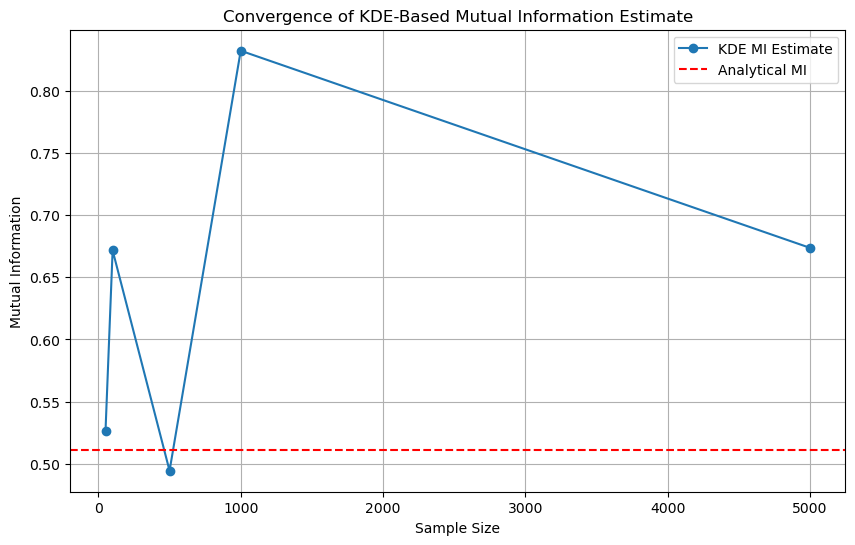

In [12]:
def evaluate_convergence(cov_matrix, sample_sizes, grid_size=100):
    analytical_mi = analytical_mutual_information(cov_matrix)
    kde_estimates = []

    for n in sample_sizes:
        samples = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix, size=n)
        kde_mi = kde_mutual_information(samples, grid_size=grid_size)
        kde_estimates.append(kde_mi)

    return analytical_mi, kde_estimates

# Sample sizes to test
sample_sizes = [50, 100, 500, 1000, 5000]

# Evaluate convergence
cov_matrix = np.array([[1.0, 0.8], [0.8, 1.0]])
analytical_mi, kde_estimates = evaluate_convergence(cov_matrix, sample_sizes)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, kde_estimates, label="KDE MI Estimate", marker="o")
plt.axhline(analytical_mi, color="red", linestyle="--", label="Analytical MI")
plt.title("Convergence of KDE-Based Mutual Information Estimate")
plt.xlabel("Sample Size")
plt.ylabel("Mutual Information")
plt.legend()
plt.grid()
plt.show()

# robustness of KDE-based methods for estimating mutual information

In [18]:
#16. Compare the performance of the Maximum Likelihood Estimator (MLE), Method of Moments Estimator (MME), and Bayesian Estimator using quadratic risk.

def compare_risks(n_simulations, sample_size, a_star, b_star, alpha_a, beta_a, alpha_b, beta_b):
    mle_risks = []
    mme_risks = []
    bayes_risks = []

    for _ in range(n_simulations):
        x = np.random.gamma(shape=a_star, scale=1/b_star, size=sample_size)

        # MME
        a_mme, b_mme = mme_gamma(x)
        mme_error = (a_mme - a_star)**2 + (b_mme - b_star)**2

        # MLE
        a_mle, b_mle = newton_raphson_mle(x, init="mme")
        mle_error = (a_mle - a_star)**2 + (b_mle - b_star)**2

        # Bayesian Estimator
        samples = mcmc_gamma(x, alpha_a, beta_a, alpha_b, beta_b, n_samples=500)
        bayes_mean_a = np.mean(samples[:, 0])
        bayes_mean_b = np.mean(samples[:, 1])
        bayes_error = (bayes_mean_a - a_star)**2 + (bayes_mean_b - b_star)**2

        mle_risks.append(mle_error)
        mme_risks.append(mme_error)
        bayes_risks.append(bayes_error)

    # Average risks
    mle_risk = np.mean(mle_risks)
    mme_risk = np.mean(mme_risks)
    bayes_risk = np.mean(bayes_risks)

    return mle_risk, mme_risk, bayes_risk

# Compare risks
sample_size = 20
n_simulations = 100
a_star, b_star = 2, 2
alpha_a, beta_a = 2, 2
alpha_b, beta_b = 2, 2

mle_risk, mme_risk, bayes_risk = compare_risks(
    n_simulations, sample_size, a_star, b_star, alpha_a, beta_a, alpha_b, beta_b
)

print(f"MLE Risk: {mle_risk:.4f}")
print(f"MME Risk: {mme_risk:.4f}")
print(f"Bayesian Risk: {bayes_risk:.4f}")


C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_22764\3312317694.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  log_likelihood = n * a * np.log(b) - n * np.math.lgamma(a) + (a - 1) * S1 - b * S2


MLE Risk: 1.2294
MME Risk: 2.5194
Bayesian Risk: 0.7145


C:\Users\sshubhankar\AppData\Local\Temp\ipykernel_22764\3312317694.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  log_likelihood = n * a * np.log(b) - n * np.math.lgamma(a) + (a - 1) * S1 - b * S2


Invalid parameters encountered, resetting.


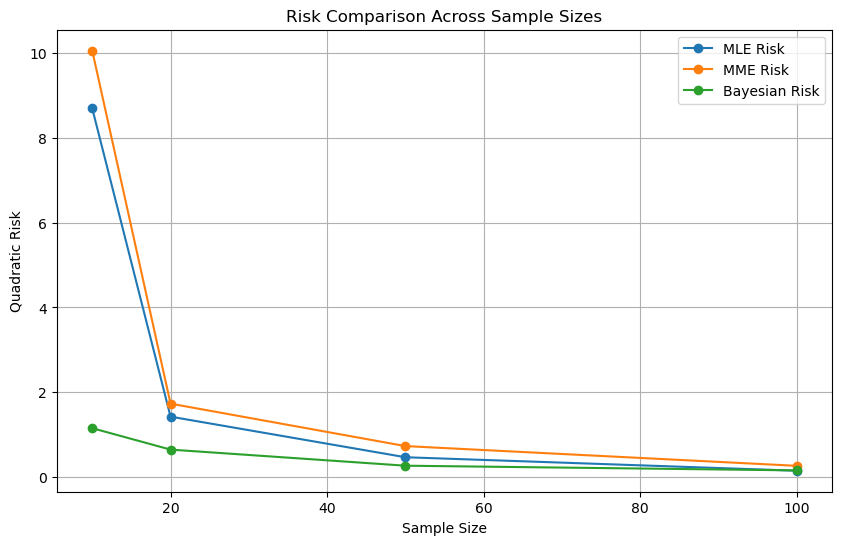

In [20]:
sample_sizes = [10, 20, 50, 100]
risks = []

for n in sample_sizes:
    risks.append(
        compare_risks(n_simulations, n, a_star, b_star, alpha_a, beta_a, alpha_b, beta_b)
    )

mle_risks, mme_risks, bayes_risks = zip(*risks)

# Plot risks
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mle_risks, label="MLE Risk", marker="o")
plt.plot(sample_sizes, mme_risks, label="MME Risk", marker="o")
plt.plot(sample_sizes, bayes_risks, label="Bayesian Risk", marker="o")
plt.title("Risk Comparison Across Sample Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Quadratic Risk")
plt.legend()
plt.grid()
plt.show()
